In [5]:
import pandas as pd

# Ruta a tus archivos CSV
archivo_csv1 = 'gamescompleto.csv'
archivo_csv2 = 'itemscompleto.csv'
archivo_csv3 = 'df_reviews_completo3sin23.csv'

# Carga de datos desde los archivos CSV en DataFrames
dfgames = pd.read_csv(archivo_csv1)
dfitems = pd.read_csv(archivo_csv2)
dfreviews = pd.read_csv(archivo_csv3)

In [6]:
dfgames.head()

,publisher,genres,item_name,title,url,release_date,tags,reviews_url,specs,price,early_access,item_id,developer
0,Kotoshiro,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",http://steamcommunity.com/app/761140/reviews/?...,['Single-player'],4.99,False,761140.0,Kotoshiro
1,"Making Fun, Inc.","['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",http://steamcommunity.com/app/643980/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free To Play,False,643980.0,Secret Level SRL
2,Poolians.com,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"['Free to Play', 'Simulation', 'Sports', 'Casu...",http://steamcommunity.com/app/670290/reviews/?...,"['Single-player', 'Multi-player', 'Online Mult...",Free to Play,False,670290.0,Poolians.com
3,彼岸领域,"['Action', 'Adventure', 'Casual']",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"['Action', 'Adventure', 'Casual']",http://steamcommunity.com/app/767400/reviews/?...,['Single-player'],0.99,False,767400.0,彼岸领域
4,Trickjump Games Ltd,"['Action', 'Adventure', 'Simulation']",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"['Action', 'Adventure', 'Simulation', 'FPS', '...",http://steamcommunity.com/app/772540/reviews/?...,"['Single-player', 'Steam Achievements']",3.99,False,772540.0,Trickjump Games Ltd


In [7]:
dfgames2 = dfgames[['item_id','item_name']]

In [8]:
dfgames2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28852 entries, 0 to 28851
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    28851 non-null  float64
 1   item_name  28851 non-null  object 
dtypes: float64(1), object(1)
memory usage: 450.9+ KB


In [9]:
dfgames2.dropna(inplace=True)


C:\Users\W10\AppData\Local\Temp\ipykernel_6244\3459923879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames2.dropna(inplace=True)


In [10]:
dfgames2.isnull().sum()

item_id      0
item_name    0
dtype: int64

In [11]:
num_filas_dupli = dfgames2.duplicated().sum()
print(f"Número de filas duplicadas: {num_filas_dupli}")


Número de filas duplicadas: 1


In [12]:
dfgames2.drop_duplicates(subset=['item_name', 'item_id'], keep='first', inplace=True)
# borramos duplicados solo si la fila completa esta duplicada

C:\Users\W10\AppData\Local\Temp\ipykernel_6244\1943008950.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames2.drop_duplicates(subset=['item_name', 'item_id'], keep='first', inplace=True)


In [13]:
dfgames2['item_id'] = pd.to_numeric(dfgames2['item_id'], errors='coerce').fillna(0).astype(int)
# convertimos la columna en formato int

C:\Users\W10\AppData\Local\Temp\ipykernel_6244\658995972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfgames2['item_id'] = pd.to_numeric(dfgames2['item_id'], errors='coerce').fillna(0).astype(int)


In [14]:
dfgames2.info()
#verificamos que no hay nulos y los formatos

<class 'pandas.core.frame.DataFrame'>
Index: 28849 entries, 0 to 28851
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    28849 non-null  int32 
 1   item_name  28849 non-null  object
dtypes: int32(1), object(1)
memory usage: 563.5+ KB


In [15]:
dfreviews.head()

,user_id,user_url,funny,Fecha_posteo,last_edited,item_id,helpful,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,NaN,2011.0,NaN,1250,No ratings yet,True,2
1,js41637,http://steamcommunity.com/id/js41637,NaN,2011.0,NaN,22200,No ratings yet,True,2
2,evcentric,http://steamcommunity.com/id/evcentric,NaN,2011.0,NaN,43110,No ratings yet,True,1
3,doctr,http://steamcommunity.com/id/doctr,NaN,2014.0,NaN,251610,15 of 20 people (75%) found this review helpful,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,NaN,2013.0,NaN,227300,0 of 1 people (0%) found this review helpful,True,1


In [16]:
dfreviews2=dfreviews[['user_id','item_id','recommend','sentiment_analysis']]

In [17]:
dfreviews2.head()

,user_id,item_id,recommend,sentiment_analysis
0,76561197970982479,1250,True,2
1,js41637,22200,True,2
2,evcentric,43110,True,1
3,doctr,251610,True,2
4,maplemage,227300,True,1


In [18]:
#juntamos los df
merged_df = pd.merge(dfgames2, dfreviews2, on='item_id', how='inner')

In [19]:
merged_df

,item_id,item_name,user_id,recommend,sentiment_analysis
0,282010,Carmageddon Max Pack,76561198076055973,True,1
1,70,Half-Life,AppoGetsSuperAdmin,True,1
2,70,Half-Life,76561198051084367,True,0
3,70,Half-Life,DropBear99,True,0
4,70,Half-Life,hecaton_john,True,2
...,...,...,...,...,...
50422,80,Counter-Strike: Condition Zero,NaN,False,1
50423,80,Counter-Strike: Condition Zero,NaN,True,2
50424,80,Counter-Strike: Condition Zero,NaN,True,2
50425,80,Counter-Strike: Condition Zero,NaN,True,1


In [20]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50427 entries, 0 to 50426
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             50427 non-null  int32 
 1   item_name           50427 non-null  object
 2   user_id             21955 non-null  object
 3   recommend           50427 non-null  bool  
 4   sentiment_analysis  50427 non-null  int64 
dtypes: bool(1), int32(1), int64(1), object(2)
memory usage: 1.4+ MB


In [21]:
# Elimina las filas con valores nulos solo en la columna 'user_id'
merged_df = merged_df.dropna(subset=['user_id'])

In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21955 entries, 0 to 50419
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             21955 non-null  int32 
 1   item_name           21955 non-null  object
 2   user_id             21955 non-null  object
 3   recommend           21955 non-null  bool  
 4   sentiment_analysis  21955 non-null  int64 
dtypes: bool(1), int32(1), int64(1), object(2)
memory usage: 793.3+ KB


C:\Users\W10\AppData\Local\Temp\ipykernel_6244\4221729050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['recommend'] = merged_df['recommend'].astype(int)


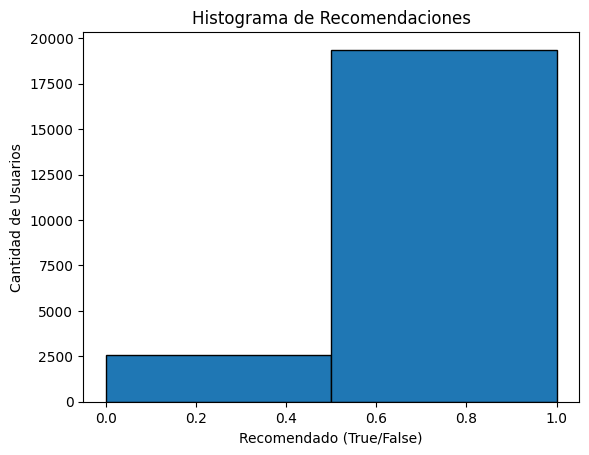

In [23]:
import matplotlib.pyplot as plt
merged_df['recommend'] = merged_df['recommend'].astype(int)
plt.hist(merged_df['recommend'], bins=2, edgecolor='k')  # bins=2 para dos barras (True y False)

plt.title('Histograma de Recomendaciones')
plt.xlabel('Recomendado (True/False)')
plt.ylabel('Cantidad de Usuarios')

plt.show()
# vemos un sesgo de recomendacions = False

In [24]:
# reducimos el data por una cuestion de espacio en render, pero sin que afecte la calidad de los datos
df_reducido = merged_df.sample(frac=0.5, random_state=1)

In [25]:
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10978 entries, 14002 to 47240
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             10978 non-null  int32 
 1   item_name           10978 non-null  object
 2   user_id             10978 non-null  object
 3   recommend           10978 non-null  int32 
 4   sentiment_analysis  10978 non-null  int64 
dtypes: int32(2), int64(1), object(2)
memory usage: 428.8+ KB


In [26]:
df_reducido['recommend'] = df_reducido['recommend'].astype(int)

In [27]:
#df_reducido['genres'] = df_reducido['genres'].str.replace(r"[\[\]']", '', regex=True)

In [28]:
df_reducido

,item_id,item_name,user_id,recommend,sentiment_analysis
14002,268750,Magicite,76561198047354266,1,2
18208,310950,Street Fighter V,76561198051433352,0,1
38616,219640,Chivalry: Medieval Warfare,PrimeDarkEther,1,0
44743,34900,Bad Rats: the Rats' Revenge,TonytheTurkey,1,2
10045,202170,Sleeping Dogs,samsamandhecancan,1,2
...,...,...,...,...,...
35531,104900,ORION: Prelude,Rotomaniac,1,0
46470,440,Team Fortress 2,76561198004624665,1,2
31125,232790,Broken Age,hitlersokiguess,1,1
38429,4920,Natural Selection 2,RebelKirby,1,0


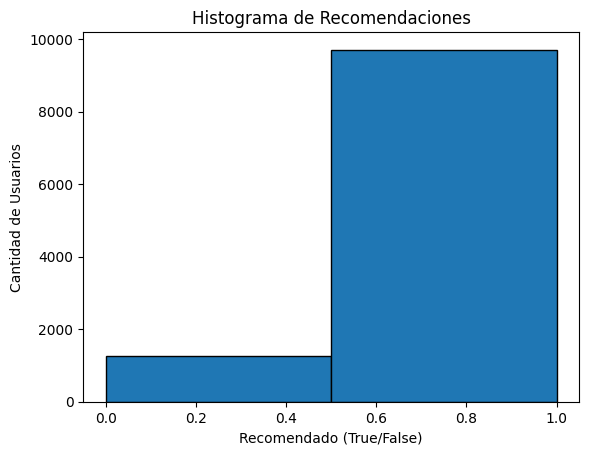

In [29]:
import matplotlib.pyplot as plt

plt.hist(df_reducido['recommend'], bins=2, edgecolor='k')  # bins=2 para dos barras (True y False)

plt.title('Histograma de Recomendaciones')
plt.xlabel('Recomendado (True/False)')
plt.ylabel('Cantidad de Usuarios')

plt.show()
# vemos un sesgo de recomendacions = False, pero mantiene la forma del df completo

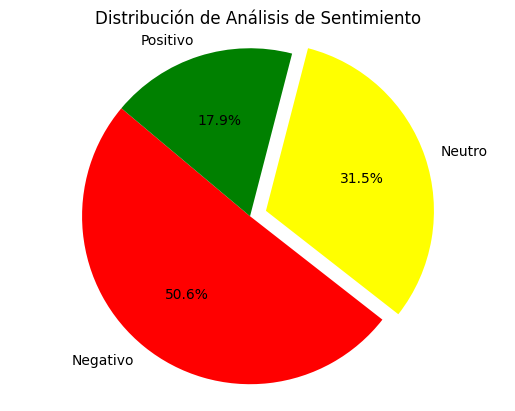

In [30]:

# Contamos la cantidad de usuarios en cada categoría de sentimiento
sentiment_counts = df_reducido['sentiment_analysis'].value_counts()

labels = ['Negativo', 'Neutro', 'Positivo']
# le damos un color
colors = ['red', 'yellow', 'green']

# Separa la categoría "Neutro" para destacarla
explode = (0, 0.1, 0)

#graficamos
plt.pie(sentiment_counts, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=140)

plt.title('Distribución de Análisis de Sentimiento')

plt.axis('equal')  # Hace que el grafico de torta sea un círculo
plt.show()
# vemos que la mitad de los sentimientos son negativos

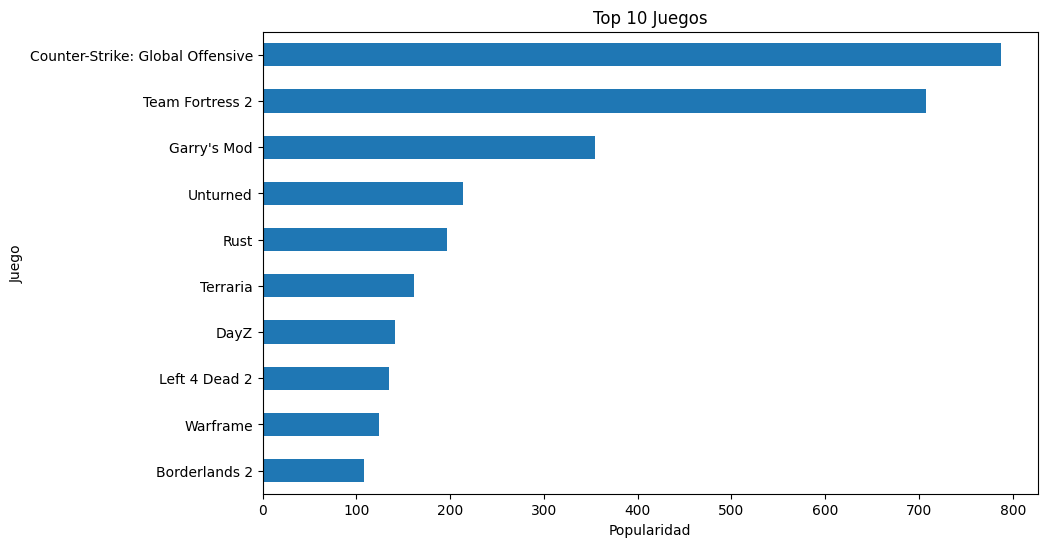

In [31]:
top_10_items = df_reducido['item_name'].value_counts().head(10)

# Ordena de mayor a menor
top_10_items = top_10_items.iloc[::-1]

# Grafica el top 10 de juegos
top_10_items.plot(kind='barh', figsize=(10, 6))

plt.title('Top 10 Juegos')
plt.xlabel('Popularidad')
plt.ylabel('Juego')

plt.show()

In [32]:
#import ast

# Convierte la columna 'genres' de cadenas a listas
#df_reducido['genres'] = df_reducido['genres'].apply(ast.literal_eval)


In [33]:
# Aplicar One-Hot Encoding a la columna 'genres'
#genres_encoded = pd.get_dummies(df_reducido['genres'].apply(pd.Series).stack()).sum(level=0)

# Concatenar los datos codificados con el DataFrame original
#df_encoded = pd.concat([df_reducido, genres_encoded], axis=1)

In [34]:
columnas_a_borrar = ['item_id', 'item_name', 'user_id']
numeric_df = df_reducido.drop(columnas_a_borrar, axis=1)

In [35]:
numeric_df

,recommend,sentiment_analysis
14002,1,2
18208,0,1
38616,1,0
44743,1,2
10045,1,2
...,...,...
35531,1,0
46470,1,2
31125,1,1
38429,1,0


In [36]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10978 entries, 14002 to 47240
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   recommend           10978 non-null  int32
 1   sentiment_analysis  10978 non-null  int64
dtypes: int32(1), int64(1)
memory usage: 214.4 KB


In [37]:
numeric_df.to_parquet('df_numerico_recomendacion.parquet')
df_reducido.to_parquet('df_user_recomendacion.parquet')

In [38]:
from google.colab import files
parquet1 = 'df_numerico_recomendacion.parquet'
# Descargar el archivo de colab
files.download(parquet1)


ModuleNotFoundError: No module named 'google.colab'

In [ ]:
parquet2 = 'df_user_recomendacion.parquet'
# Descargar el archivo de colab
files.download(parquet2)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
dfnum = pd.read_parquet('df_numerico_recomendacion.parquet')
dfuser = pd.read_parquet('df_user_recomendacion.parquet')


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
user_similarity = cosine_similarity(dfnum)
user_similarity_df = pd.DataFrame(user_similarity, index=dfuser['user_id'], columns=dfuser['user_id'])

print(user_similarity_df)

user_id               76561198109015633  76561198069032355  76561198077794867  \
user_id                                                                         
76561198109015633              1.000000           0.707107           1.000000   
76561198069032355              0.707107           1.000000           0.707107   
76561198077794867              1.000000           0.707107           1.000000   
JookzTheGookz                  1.000000           0.707107           1.000000   
YouWannaFuckingGoM99           1.000000           0.707107           1.000000   
...                                 ...                ...                ...   
arbiter928                     0.707107           1.000000           0.707107   
76561198078649960              1.000000           0.707107           1.000000   
James_2711                     1.000000           0.707107           1.000000   
ihasMUFFINSWAG                 0.948683           0.447214           0.948683   
FokkoChan                   

In [ ]:
user_similarity_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4756 entries, 76561198109015633 to FokkoChan
Columns: 4756 entries, 76561198109015633 to FokkoChan
dtypes: float64(4756)
memory usage: 172.6+ MB


In [ ]:
user_similarity_df.head()

user_id,76561198109015633,76561198069032355,76561198077794867,JookzTheGookz,YouWannaFuckingGoM99,76561198076180625,76561198090302241,nuclearpig22,76561198054914056,The_Aviating_Butler,...,pedrosomar,76561198068572619,76561198043737314,76561198078194423,uncleden,arbiter928,76561198078649960,James_2711,ihasMUFFINSWAG,FokkoChan
user_id,,,,,,,,,,,,,,,,,,,,,
76561198109015633,1.000000,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,...,0.948683,0.948683,0.948683,0.0,0.948683,0.707107,1.000000,1.000000,0.948683,0.948683
76561198069032355,0.707107,1.000000,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,0.707107,1.000000,...,0.447214,0.447214,0.447214,0.0,0.447214,1.000000,0.707107,0.707107,0.447214,0.447214
76561198077794867,1.000000,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,...,0.948683,0.948683,0.948683,0.0,0.948683,0.707107,1.000000,1.000000,0.948683,0.948683
JookzTheGookz,1.000000,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,...,0.948683,0.948683,0.948683,0.0,0.948683,0.707107,1.000000,1.000000,0.948683,0.948683
YouWannaFuckingGoM99,1.000000,0.707107,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.707107,...,0.948683,0.948683,0.948683,0.0,0.948683,0.707107,1.000000,1.000000,0.948683,0.948683


In [ ]:
def recomendacion_usuario(user_id):
    # Verifica si el usuario está en el DataFrame de similitud
    if user_id not in user_similarity_df.index:
        return "Usuario no encontrado"

    # Obtiene la fila de similitud del usuario
    user_similarity = user_similarity_df.loc[user_id]

    # Ordena los usuarios por similitud en orden descendente
    similar_users = user_similarity.sort_values(ascending=False)[1:]  # Excluye al propio usuario

    # Filtra los juegos jugados por usuarios similares
    user_data = df_reducido[df_reducido['user_id'] == user_id]
    games_played = user_data['item_name'].unique()

    # Genera una lista de juegos recomendados
    recommendations = []
    unique_recommendations = set()  # Conjunto para asegurar recomendaciones únicas

    for similar_user_id, similarity_score in similar_users.items():
        similar_user_data = df_reducido[df_reducido['user_id'] == similar_user_id]
        for game in similar_user_data['item_name']:
            if game not in games_played and game not in unique_recommendations:
                recommendations.append(game)
                unique_recommendations.add(game)
            if len(recommendations) >= 10:  # Recolecta 10 recomendaciones, ajusta según sea necesario
                break

    return recommendations[:5]  # Devuelve las primeras 5 recomendaciones únicas



In [ ]:
recomendacion_usuario('JookzTheGookz')

['Fistful of Frags',
 'Counter-Strike: Global Offensive',
 'The Long Dark',
 'Half-Life',
 'Fallout: New Vegas']